* Build two neural networks (N1 and N2).
* N1 with 3 hidden layers 
* N2 with 4 hidden layers 
* Use mean square error as well as cross-entropy as loss function in both the models.
* Apply stochastic and mini-batch gradient descent (take batch size=40) in both the models.
* Use the attached dataset obesity_data.csv
* Mark the no. of iterations for best prediction.
* Report the results using early stopping and dropout.

In [187]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split


In [188]:
#Load dataset 
data = pd.read_csv('E:\COLLEGE RESOURCES\semister 6\DEEP LEARNING LAB\DEEP-LEARNING-LAB---AIC3970\WEEK 5\obesity_data.csv')

<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\FAIZ SIDDIQUI\AppData\Local\Temp\ipykernel_8264\1142282629.py:2: SyntaxWarning: invalid escape sequence '\C'
  data = pd.read_csv('E:\COLLEGE RESOURCES\semister 6\DEEP LEARNING LAB\DEEP-LEARNING-LAB---AIC3970\WEEK 5\obesity_data.csv')


In [189]:
data.shape

(1000, 7)

In [190]:
data.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel',
       'ObesityCategory'],
      dtype='object')

In [191]:
data['ObesityCategory'].unique()

array(['Normal weight', 'Obese', 'Overweight', 'Underweight'],
      dtype=object)

In [192]:
data['PhysicalActivityLevel'].unique()

array([4, 2, 3, 1])

In [193]:
data['ObesityCategory'].value_counts()

ObesityCategory
Normal weight    371
Overweight       295
Obese            191
Underweight      143
Name: count, dtype: int64

In [194]:
# conclusion -- balance dataset
data['PhysicalActivityLevel'].value_counts()

PhysicalActivityLevel
4    259
3    255
2    247
1    239
Name: count, dtype: int64

In [195]:
count = data.groupby(['Gender', 'ObesityCategory']).size()
print(count)

Gender  ObesityCategory
Female  Normal weight      165
        Obese               92
        Overweight         155
        Underweight         65
Male    Normal weight      206
        Obese               99
        Overweight         140
        Underweight         78
dtype: int64


In [196]:
count = data.groupby(['Gender', 'ObesityCategory']).size().unstack()
print(count)

ObesityCategory  Normal weight  Obese  Overweight  Underweight
Gender                                                        
Female                     165     92         155           65
Male                       206     99         140           78


In [197]:
# conclusion -- balance dataset
data['Gender'].value_counts()

Gender
Male      523
Female    477
Name: count, dtype: int64

In [198]:
## missing value 
data.isnull().sum()

Age                      0
Gender                   0
Height                   0
Weight                   0
BMI                      0
PhysicalActivityLevel    0
ObesityCategory          0
dtype: int64

In [199]:
## to check duplicate record 
data[data.duplicated()]

# ## if there is duplicate record then
# data.drop_duplicates(inplace= True)

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory


In [200]:
data.head(10)

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight
5,25,Female,166.405627,61.145868,22.081628,4,Normal weight
6,78,Male,183.566334,92.208521,27.364341,3,Overweight
7,38,Male,142.875095,59.359746,29.078966,1,Overweight
8,56,Male,183.478558,75.157672,22.325577,4,Normal weight
9,75,Male,182.974061,81.533460,24.353244,2,Normal weight


In [201]:
data['Gender'].unique()
# data.drop('Gender', axis= 1 , inplace= True)

array(['Male', 'Female'], dtype=object)

In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


In [203]:
data.describe()

,Age,Height,Weight,BMI,PhysicalActivityLevel
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.857000,170.052417,71.205769,24.888317,2.534000
std,18.114267,10.309971,15.509849,6.193912,1.116284
min,18.000000,136.115719,26.065730,8.470572,1.000000
25%,35.000000,163.514205,61.129629,20.918068,2.000000
50%,50.000000,169.801665,71.929072,24.698647,3.000000
75%,66.000000,177.353596,81.133746,28.732132,4.000000
max,79.000000,201.419670,118.907366,50.791898,4.000000


In [204]:
# data2 = data
# data2.drop('ObesityCategory', axis= 1 , inplace= True)

In [205]:
# import matplotlib.pyplot as plt 
# import seaborn as sns
# plt.figure(figsize = (10,6))
# sns.heatmap(data2.corr(), annot = True)

In [206]:
# data2.PhysicalActivityLevel.value_counts().plot(kind= 'bar')

In [207]:
print(data.columns)


Index(['Age', 'Gender', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel',
       'ObesityCategory'],
      dtype='object')


In [208]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder, StandardScaler , OneHotEncoder
encoder = LabelEncoder()
data['ObesityCategory'] = encoder.fit_transform(data['ObesityCategory'])
data['Gender'] = encoder.fit_transform(data['Gender'])


In [209]:
data['ObesityCategory'].unique()

array([0, 1, 2, 3])

In [210]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X = data[['Age', 'Gender', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel']].values

# Convert ObesityCategory to numerical labels for regression
le = LabelEncoder()
y_reg = le.fit_transform(data['ObesityCategory']).reshape(-1, 1)  # Regression target

# One-hot encoding for classification
ohe = OneHotEncoder(sparse_output=False)
y_class = ohe.fit_transform(data[['ObesityCategory']])  # Classification target

# Train-test split
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

print(f"Train shapes: {X_train.shape}, {y_train_reg.shape}, {y_train_class.shape}")

Train shapes: (800, 6), (800, 1), (800, 4)


In [211]:
# Neural Network Components
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons, dropout_rate=0.3):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        self.dropout_rate = dropout_rate
        self.dropout_mask = None

    def forward(self, inputs, training=True):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases
        if training and self.dropout_rate > 0:
            self.dropout_mask = np.random.rand(*self.output.shape) > self.dropout_rate
            self.output *= self.dropout_mask

    def backward(self, dvalues):
        if self.dropout_rate > 0:
            dvalues *= self.dropout_mask
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        self.dinputs = np.dot(dvalues, self.weights.T)

In [212]:
class Activation_ReLU:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.maximum(0, inputs)

    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0

class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        self.output = exp_values / np.sum(exp_values, axis=1, keepdims=True)

    def backward(self, dvalues):
        self.dinputs = self.output * (dvalues - np.sum(dvalues * self.output, axis=1, keepdims=True))

class Loss_MSE:
    def forward(self, y_pred, y_true):
        return np.mean((y_true - y_pred) ** 2)

    def backward(self, y_pred, y_true):
        self.dinputs = -2 * (y_true - y_pred) / y_true.shape[0]

class Loss_CategoricalCrossentropy:
    def forward(self, y_pred, y_true):
        return -np.sum(y_true * np.log(y_pred + 1e-9)) / y_true.shape[0]

    def backward(self, y_pred, y_true):
        self.dinputs = -y_true / (y_pred + 1e-9)

class Optimizer_SGD:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate

    def update_params(self, layer):
        if hasattr(layer, 'weights'):
            layer.weights -= self.learning_rate * layer.dweights
            layer.biases -= self.learning_rate * layer.dbiases

Training N1 for Obesity Category Regression
Epoch 0, Loss: 2.3871
Epoch 10, Loss: 1.6797


Epoch 20, Loss: 1.5676
Early stopping at epoch 26


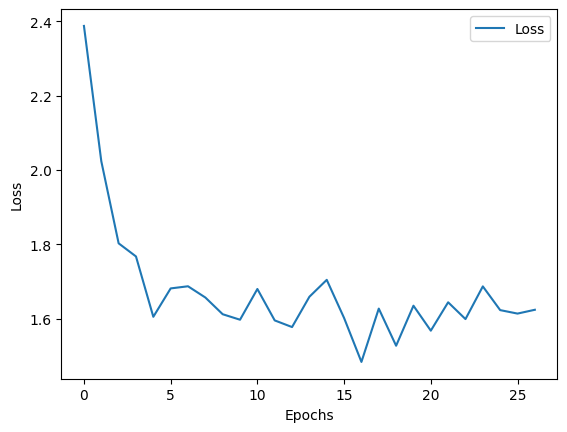

Best loss: 1.4835 at epoch 16
Training N2 for Obesity Category Classification
Epoch 0, Loss: 1.3561
Epoch 10, Loss: 1.3355
Early stopping at epoch 17


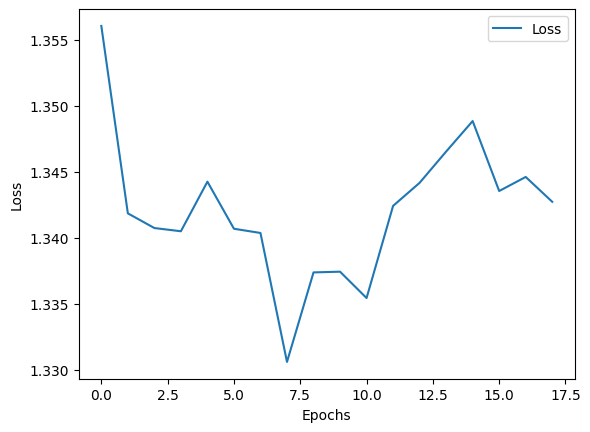

Best loss: 1.3306 at epoch 7


In [213]:
# Training Function
def train_neural_network(X, y, model_structure, loss_function, learning_rate=0.01, epochs=100, batch_size=40, early_stopping=True):
    optimizer = Optimizer_SGD(learning_rate)
    layers = model_structure
    losses = []
    best_loss = float('inf')
    best_epoch = 0

    for epoch in range(epochs):
        epoch_loss = 0
        for i in range(0, X.shape[0], batch_size):
            X_batch = X[i:i + batch_size]
            y_batch = y[i:i + batch_size]

            # Forward pass
            input_data = X_batch
            for layer in layers:
                layer.forward(input_data)
                input_data = layer.output

            loss = loss_function.forward(input_data, y_batch)
            epoch_loss += loss

            # Backward pass
            loss_function.backward(input_data, y_batch)
            gradient = loss_function.dinputs
            for layer in reversed(layers):
                layer.backward(gradient)
                gradient = layer.dinputs

            # Update parameters
            for layer in layers:
                optimizer.update_params(layer)

        avg_loss = epoch_loss / (X.shape[0] // batch_size)
        losses.append(avg_loss)
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {avg_loss:.4f}")

        # Early stopping
        if early_stopping and avg_loss < best_loss:
            best_loss = avg_loss
            best_epoch = epoch
        elif early_stopping and epoch - best_epoch >= 10:
            print(f"Early stopping at epoch {epoch}")
            break

    plt.plot(losses, label='Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    print(f"Best loss: {best_loss:.4f} at epoch {best_epoch}")

# Define Models
# N1: Obesity Category Regression
n1_structure = [
    Layer_Dense(6, 64, dropout_rate=0.2), Activation_ReLU(),
    Layer_Dense(64, 32, dropout_rate=0.2), Activation_ReLU(),
    Layer_Dense(32, 16, dropout_rate=0.2), Activation_ReLU(),
    Layer_Dense(16, 1)  # Regression Output
]

# N2: Obesity Category Classification
n2_structure = [
    Layer_Dense(6, 64, dropout_rate=0.2), Activation_ReLU(),
    Layer_Dense(64, 32, dropout_rate=0.2), Activation_ReLU(),
    Layer_Dense(32, 16, dropout_rate=0.2), Activation_ReLU(),
    Layer_Dense(16, 8, dropout_rate=0.2), Activation_ReLU(),
    Layer_Dense(8, y_class.shape[1]), Activation_Softmax()  # Classification Output
]

# Train Models
print("Training N1 for Obesity Category Regression")
train_neural_network(X_train, y_train_reg, n1_structure, Loss_MSE())

print("Training N2 for Obesity Category Classification")
train_neural_network(X_train, y_train_class, n2_structure, Loss_CategoricalCrossentropy())
X = data[['Age', 'Gender', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel']].values



In [214]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
# Evaluation
def predict(model_structure, X):
    input_data = X
    for layer in model_structure:
        layer.forward(input_data)
        input_data = layer.output
    return input_data

# Regression Model Evaluation
y_pred_reg = predict(n1_structure, X_test)
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)
print(f"\nRegression Model: MSE={mse:.4f}, R²={r2:.4f}")

# Classification Model Evaluation
y_pred_class = predict(n2_structure, X_test)
y_pred_class_labels = np.argmax(y_pred_class, axis=1)
y_true_class_labels = np.argmax(y_test_class, axis=1)

accuracy = accuracy_score(y_true_class_labels, y_pred_class_labels)
precision = precision_score(y_true_class_labels, y_pred_class_labels, average='weighted')
recall = recall_score(y_true_class_labels, y_pred_class_labels, average='weighted')
f1 = f1_score(y_true_class_labels, y_pred_class_labels, average='weighted')

print(f"\nClassification Model: Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1-score={f1:.4f}")


Regression Model: MSE=1.7828, R²=-0.4501

Classification Model: Accuracy=0.3450, Precision=0.2230, Recall=0.3450, F1-score=0.2479


C:\Users\FAIZ SIDDIQUI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
